In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.modeling import models, fitting
from matplotlib.colors import LogNorm

import pandas as pd

# Set up matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

**Reading a file.** The one we are using here is a cross-match of ALFALFA, Galaxy Zoo 2, NSA, and SDSS data.

Expert tutorial on reading a fits file: 
https://docs.astropy.org/en/stable/io/fits/index.html

`nsa_ALFALFA.info()` allows us to see the content of the file.

In [2]:
nsa_ALFALFA = fits.open('final_data.fits', memmap=True)
nsa_ALFALFA.info()
print("done")

Filename: final_data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (29634,)   uint8   
  1  Joined        1 BinTableHDU    858   12854R x 372C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, I, J, 8A, D, D, D, D, I, I, I, I, E, E, E, E, E, E, E, E, I, K, K, K, D, D, 11A, 11A, 8A, 8A, I, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, D, I, I, E, E, E, 

Checking the headers to find the one(s) we want to work with

In [3]:
hdu0 = nsa_ALFALFA[0]
hdu0.header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                29634 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [4]:
hdu = nsa_ALFALFA[1]
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                 4973 / width of table in bytes                        
NAXIS2  =                12854 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                  372 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'IAUNAME '           / label for column 1                             
TFORM1  = '19A     '           / format for column 1                            
TTYPE2  = 'SUBDIR  '           / label for column 2                             
TFORM2  = '27A     '        

We want to work with `hdu`

In [5]:
evt_data = Table(hdu.data)
evt_data

IAUNAME,SUBDIR,RA_1,DEC_1,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z_1,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY [7],SERSIC_NMGY_IVAR [7],SERSIC_OK,SERSIC_RNMGY [7],SERSIC_ABSMAG [7],SERSIC_AMIVAR [7],EXTINCTION [7],SERSIC_KCORRECT [7],SERSIC_KCOEFF [5],SERSIC_MTOL [7],SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETRO_FLUX [7],PETRO_FLUX_IVAR [7],FIBER_FLUX [7],FIBER_FLUX_IVAR [7],PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX [7],SERSIC_FLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX [7],ELPETRO_FLUX_IVAR [7],ELPETRO_TH50 [7],ELPETRO_TH90 [7],ELPETRO_APCORR_R,ELPETRO_APCORR [7],ELPETRO_APCORR_SELF [7],ELPETRO_NMGY [7],ELPETRO_NMGY_IVAR [7],ELPETRO_OK,ELPETRO_RNMGY [7],ELPETRO_ABSMAG [7],ELPETRO_AMIVAR [7],ELPETRO_KCORRECT [7],ELPETRO_KCOEFF [5],ELPETRO_MASS,ELPETRO_MTOL [7],ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode,specobjid,dr8objid,dr7objid,ra_2,dec_2,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a

We can read specific columns and plot them. For example, plotting $\log [M_{HI}/M_*]$ against $\log M_*$

Text(0,0.5,'$\\log [(M_{HI}/M_*)/M_\\odot]$')

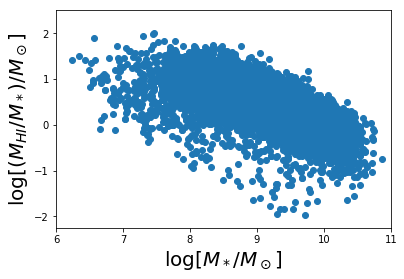

In [6]:
h = 0.7
x = np.log10(evt_data['ELPETRO_MASS']*h**2)
y = evt_data['logMH']-np.log10(evt_data['ELPETRO_MASS']*h**2)

plt.scatter(x,y)
plt.xlim(6,11)
plt.ylim(-2.25,2.5)
plt.xlabel("$\log [M_*/M_\odot]$", fontsize=20)
plt.ylabel("$\log [(M_{HI}/M_*)/M_\odot]$", fontsize=20)

We use the conditions $0.2<p_{bar}<0.5$ and $p_{bar} \geq 0.5$ for weak bars and strong bars

In [7]:
condition_1 = evt_data['t03_bar_a06_bar_debiased'] > 0.2
filtered_1 = evt_data[condition_1]

condition_2 = filtered_1['t03_bar_a06_bar_debiased'] < 0.5
wk_barred_gal = filtered_1[condition_2]
#wk_barred_gal

In [8]:
st_bar = evt_data['t03_bar_a06_bar_debiased'] >= 0.5 
st_barred_gal = evt_data[st_bar]
#st_barred_gal

We can make histograms using `plt.hist`. 

Notice that we set the ranges of the data to be the same. This allows us to have a better comparison and helps us avoid the 0 values.

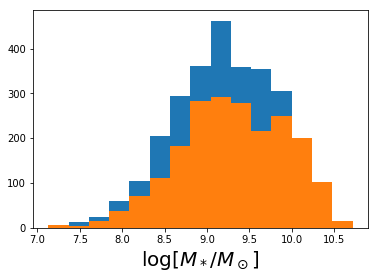

In [9]:
plt.hist(np.log10(wk_barred_gal['ELPETRO_MASS']*h**2),bins=15,range=(min(np.log10(st_barred_gal['ELPETRO_MASS']*h**2)),max(np.log10(st_barred_gal['ELPETRO_MASS']*h**2))))
plt.hist(np.log10(st_barred_gal['ELPETRO_MASS']*h**2),bins=15,range=(min(np.log10(st_barred_gal['ELPETRO_MASS']*h**2)),max(np.log10(st_barred_gal['ELPETRO_MASS']*h**2))))
plt.xlabel('$\log [M_*/M_\odot]$', fontsize=20)
plt.show()

For bar fractions, we need to use `np.histogram`

The general procedure is:

1) Try to pick a range in the data where there are no outliers. We look for places where the data is most "concentrated."

2) Divide the data into different bins, and (let python) count the frequency of the each type of data in each bin.

3) Calculate the ratio of the frequencies of different data in each bin.

4) Plot the bins on the x-axis and the fractions on the y-axis.

For example, we want to see the relationship between bar fraction and the gas fraction.

In [10]:
all_gal = evt_data

(array([  2.,   6.,  26., 136., 424., 603., 594., 226.,  43.,   2.,   0.,
          1.]),
 array([-1.97855759, -1.56525099, -1.1519444 , -0.7386378 , -0.32533121,
         0.08797538,  0.50128198,  0.91458857,  1.32789516,  1.74120176,
         2.15450835,  2.56781495,  2.98112154]),
 <a list of 12 Patch objects>)

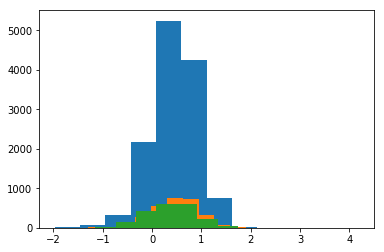

In [11]:
total_gasfrac = all_gal['logMH']-np.log10(all_gal['ELPETRO_MASS']*h**2)
wk_barred_gasfrac = wk_barred_gal['logMH']-np.log10(wk_barred_gal['ELPETRO_MASS']*h**2)
st_barred_gasfrac = st_barred_gal['logMH']-np.log10(st_barred_gal['ELPETRO_MASS']*h**2)
plt.hist(total_gasfrac,bins=12)
plt.hist(wk_barred_gasfrac,bins=12)
plt.hist(st_barred_gasfrac,bins=12)

It seems like, out of total 12 bins, the data is most "concentrated" in the 4th to 8th bins. We will focus in that range. Again, we manually set a range for the data to avoid 0 values. One can imagine that a bar fraction of 0 in a certain range is not very informative.

In [12]:
st_hist,st_bin_edges = np.histogram(st_barred_gal['logMH']-np.log10(st_barred_gal['ELPETRO_MASS']*h**2),range=(-0.74,0.92), bins=8)
print(st_hist,type(st_hist))
print(st_bin_edges,type(st_bin_edges))

[ 50  86 176 250 310 301 320 272] <class 'numpy.ndarray'>
[-0.74   -0.5325 -0.325  -0.1175  0.09    0.2975  0.505   0.7125  0.92  ] <class 'numpy.ndarray'>


When we use `np.histogram`, the first output (in our case `st_hist`) gives the frequency; the second output (in our case `st_bin_edges`) gives us the values of the edges of the bins.

**Notice**

We set the number of bins to 8 (`bins=8`), and we get 8 frequency values, but 9 bin edge values. When we make fraction plots, we need to take care of the edges, otherwise the dimensions don't match.

We repeat the process for weakly barred galaxies and total data.

In [13]:
wk_hist,wk_bin_edges = np.histogram(wk_barred_gal['logMH']-np.log10(wk_barred_gal['ELPETRO_MASS']*h**2),range=(-0.74,0.92), bins=8)
print(wk_hist)
print(wk_bin_edges)

[ 26  60 160 267 381 487 502 458]
[-0.74   -0.5325 -0.325  -0.1175  0.09    0.2975  0.505   0.7125  0.92  ]


In [14]:
all_hist,all_bin_edges = np.histogram(all_gal['logMH']-np.log10(all_gal['ELPETRO_MASS']*h**2),range=(-0.74,0.92), bins=8)
print(all_hist)
print(all_bin_edges)

[ 152  331  744 1283 1859 2242 2325 1943]
[-0.74   -0.5325 -0.325  -0.1175  0.09    0.2975  0.505   0.7125  0.92  ]


We've finished steps 1) and 2). Now we calculate the fractions. There are certainly many ways of doing it. Here is one way (the only way I know).

In [15]:
bin_edge = list()
st_frac = list()
wk_frac = list()
total_bar_frac = list()

for i in range(len(st_hist)):
    bin_edge.append((st_bin_edges[i]+st_bin_edges[i+1])/2) #We took care of the bin edges by only taking the mean value between edges. 
    st_frac.append(st_hist[i]/all_hist[i])
    wk_frac.append(wk_hist[i]/all_hist[i])
    total_bar_frac.append((st_hist[i]+wk_hist[i])/all_hist[i])

print(bin_edge)
print(st_frac)
print(wk_frac)
print(total_bar_frac)

[-0.63625, -0.42874999999999996, -0.22124999999999995, -0.013749999999999929, 0.1937500000000001, 0.4012500000000001, 0.6087500000000001, 0.8162500000000001]
[0.32894736842105265, 0.2598187311178248, 0.23655913978494625, 0.19485580670303976, 0.16675632060247444, 0.13425512934879572, 0.13763440860215054, 0.1399897066392177]
[0.17105263157894737, 0.18126888217522658, 0.21505376344086022, 0.20810600155884645, 0.20494889725658957, 0.21721677074041035, 0.21591397849462365, 0.2357179619145651]
[0.5, 0.44108761329305135, 0.45161290322580644, 0.4029618082618862, 0.371705217859064, 0.3514719000892061, 0.3535483870967742, 0.3757076685537828]


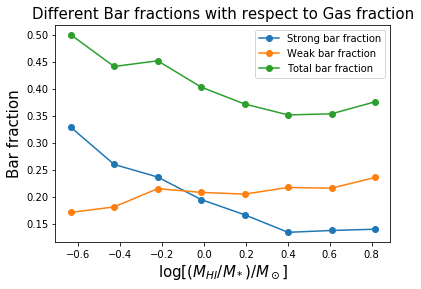

In [16]:
plt.plot(bin_edge,st_frac,'-o',label='Strong bar fraction')
plt.plot(bin_edge,wk_frac,'-o',label='Weak bar fraction')
plt.plot(bin_edge,total_bar_frac,'-o',label='Total bar fraction')
plt.xlabel("$\log [(M_{HI}/M_*)/M_\odot]$", fontsize=15)
plt.ylabel("Bar fraction", fontsize=15)
plt.title('Different Bar fractions with respect to Gas fraction',fontsize=15)
plt.legend()
plt.savefig('Fraction plot example.png',bbox_inches='tight')

For reference:

Numpy Histogram
https://numpy.org/doc/stable/reference/generated/numpy.histogram.htmlhttps://numpy.org/doc/stable/reference/generated/numpy.histogram.html

Matplotlib Plot
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html